# Homework 4

### By Marvyn Bailly

In [3]:
using LinearAlgebra, Plots, LaTeXStrings, SparseArrays

## Question 3

In [21]:
f = x -> exp(-20*(x - 1/2)^2)
df = x -> -40*(x - 1/2)*exp(-20*(x - 1/2)^2)
g = x -> sin(4 * pi * x)

function solve_wave(m,c,stop)
    h = 1/(1+m)
    k = h
    xs = 0:h:1-h

    S = Tridiagonal(fill(-1.0,m),fill(0.0,m+1),fill(1.0,m)) |> sparse
    S[1,end] = -1
    S[end,1] = 1

    A = SymTridiagonal(fill(2.0,m+1),fill(-1.0,m)) |> sparse
    A[1,end] = -1
    A[end,1] = -1

    v1 = map(f, xs)
    v2 = map(g, xs) + c*map(df,xs)
    for t=0:k:stop 
        v1 = (I - ((c*k)/(2*h)) * S - ((c^2*k^2)/(2*h^2)) * A)*v1 + k*v2
        v2 = (I + ((c*k)/(2*h)) * S - ((c^2*k^2)/(2*h^2)) * A)*v2;
    end
    
    return xs,v1
end

solve_wave (generic function with 1 method)

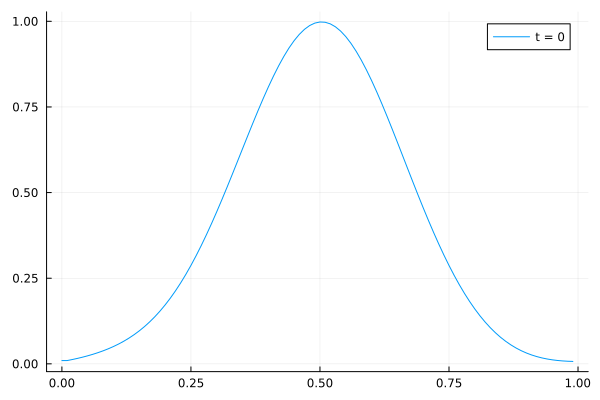

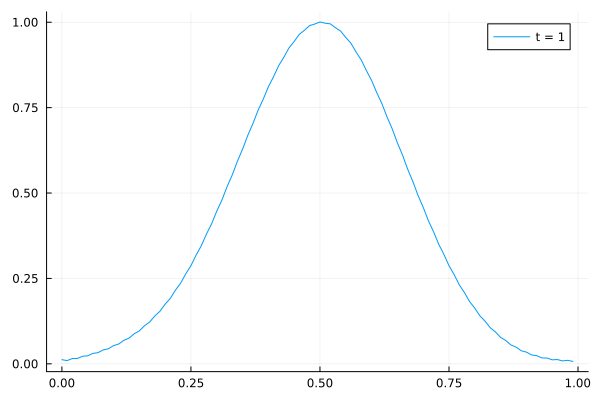

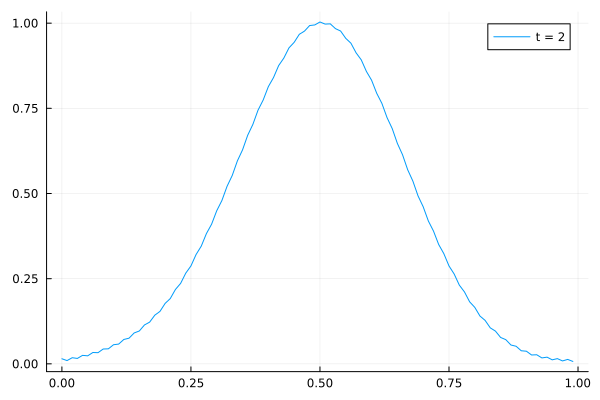

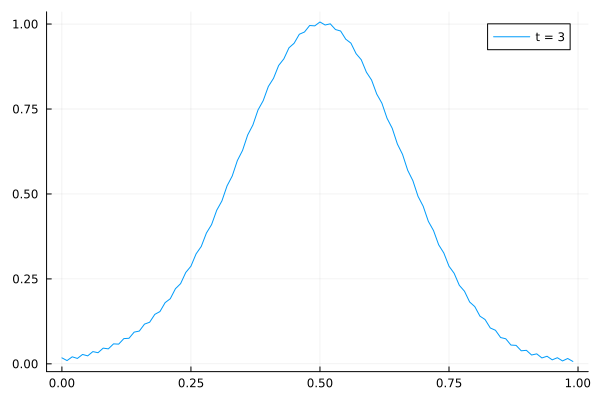

In [25]:
ts = [0,1,2,3]

for i=1:4
    t = ts[i]
    sol = solve_wave(99,1,t)
    graph = plot(sol[1],sol[2],label="t = $t")
    display(graph)
    savefig(graph,joinpath("..","pdf","images","3-"*string(i)*".png")) 
end

## Question 4

In [2]:
function CN(U,k,Aκ)
    U = (I - (k/2) * Aκ) \ (I + (k/2) * Aκ)*U    
end

function RK2(U,k)
    #f = u -> u*(1 - u)*(u - 1/2)
    #U1 = U + k/2*(map(f,U))
    #U2 = U1 + k*map(f,U)
    #return U2
    utemp = U.+ 0.5*k*U.*(1.0.-U).*(U.-0.5)
    U = U.+k*utemp.*(1.0.-utemp).*(utemp.-0.5)
end

RK2 (generic function with 1 method)

In [11]:
function solve_diffusion(T,κ,h,stop)
    η = x -> ((1 + tanh(20*(x - 0.25)))*(1 + tanh(20*(-x + 0.75))))/4
    
    m = convert(Int64,1/h)-1
    k = 0.1*h
    xs = h:h:1-h

    A = SymTridiagonal(fill(-2.0,m),fill(1.0,m-1)) |> sparse
    A[1,end] = 1
    A[end,1] = 1
    diag = Diagonal(map(κ,xs)) |> Matrix
    Aκ = (1/h^2) * diag * A

    U = map(η,xs)
   
    for t=0:k:T
        U = RK2(U,k/2)
        U = CN(U,k,Aκ)
        U = RK2(U,k/2) 

        if t == stop
            return xs, U
        end
    end
    return xs, U
end

solve_diffusion (generic function with 1 method)

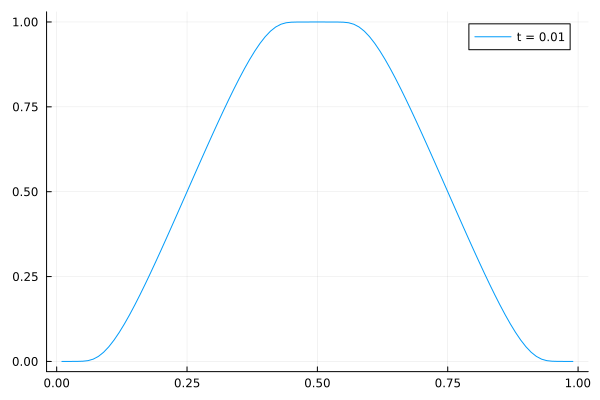

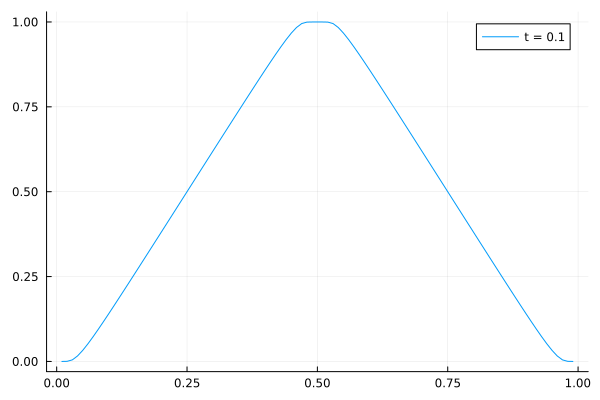

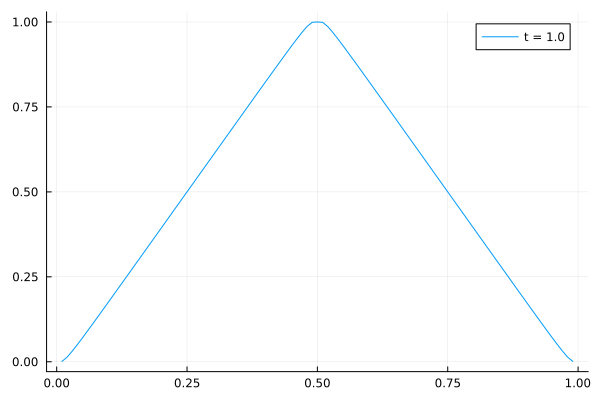

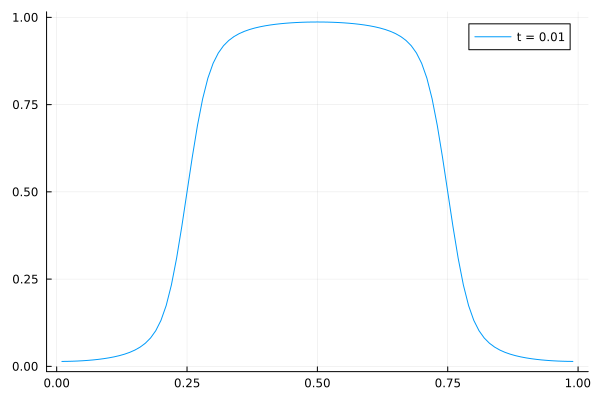

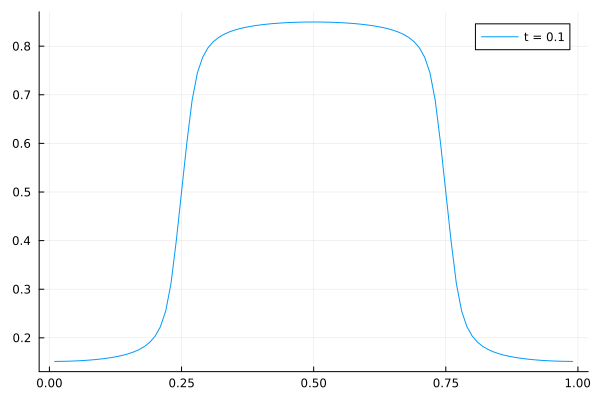

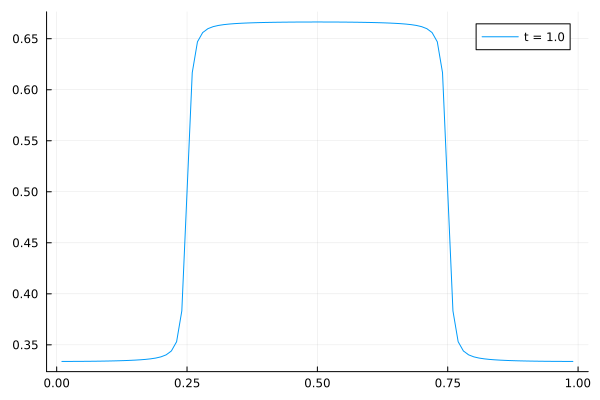

In [12]:
ts = [0.01,0.1,1.0]

κ = x -> sin(2*pi*x - pi)^4
for i=1:3
    t = ts[i]
    sol = solve_diffusion(1,κ,0.01,t)
    graph = plot(sol[1],sol[2],label="t = $t")
    display(graph)
    savefig(graph,joinpath("..","pdf","images","4a-"*string(i)*".png"))
end

κ = x -> cos(2 * pi * x)^4
for i=1:3
    t = ts[i]
    sol = solve_diffusion(1,κ,0.01,t)
    graph = plot(sol[1],sol[2],label="t = $t")
    display(graph)
    savefig(graph,joinpath("..","pdf","images","4b-"*string(i)*".png"))
end